In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')

from datetime import datetime

In [2]:
# Import the Dataset
selected_month = pd.read_csv('2019-Dec.csv.gz', compression='gzip',
                   error_bad_lines=False)
selected_month.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,view,1005105,2232732093077520756,construction.tools.light,apple,1302.48,556695836,ca5eefc5-11f9-450c-91ed-380285a0bc80
1,2019-12-01 00:00:00 UTC,view,22700068,2232732091643068746,NaN,force,102.96,577702456,de33debe-c7bf-44e8-8a12-3bf8421f842a
2,2019-12-01 00:00:01 UTC,view,2402273,2232732100769874463,appliances.personal.massager,bosch,313.52,539453785,5ee185a7-0689-4a33-923d-ba0130929a76
3,2019-12-01 00:00:02 UTC,purchase,26400248,2053013553056579841,computers.peripherals.printer,NaN,132.31,535135317,61792a26-672f-4e61-9832-7b63bb1714db
4,2019-12-01 00:00:02 UTC,view,20100164,2232732110089618156,apparel.trousers,nika,101.68,517987650,906c6ca8-ff5c-419a-bde9-967ba8e2233e


In [3]:
selected_month.shape

(67542878, 9)

In [4]:
selected_month.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

QUESTION 3:

            What is the brand whose prices are higher on average?

In [5]:
# Select part of the dataset
Month = selected_month.iloc[:,1:7]
# drop the excess column
Month = Month.drop(columns=['event_type','product_id','category_id']) 
Month.head()

,category_code,brand,price
0,construction.tools.light,apple,1302.48
1,NaN,force,102.96
2,appliances.personal.massager,bosch,313.52
3,computers.peripherals.printer,NaN,132.31
4,apparel.trousers,nika,101.68


In [6]:
# Group the column by category_code and brand and compute the average price
table = Month.groupby(['category_code','brand'], as_index=False)['price'].mean()
# rename the column
table = table.rename(columns={"price": "average_price"})
table

,category_code,brand,average_price
0,accessories.bag,a-elita,37.414381
1,accessories.bag,acer,74.448336
2,accessories.bag,adidas,2.184109
3,accessories.bag,adili,123.613050
4,accessories.bag,agatharuizdelaprada,24.450000
...,...,...,...
12859,stationery.cartrige,topran,15.916667
12860,stationery.cartrige,vagoriginal,48.650000
12861,stationery.cartrige,xerox,66.670000
12862,stationery.cartrige,xiaomi,20.570000


In [7]:
# Split the "category_code" data in category and sub_category
table['category'], table['sub_category'] = table['category_code'].str.split('.', 1).str
table

,category_code,brand,average_price,category,sub_category
0,accessories.bag,a-elita,37.414381,accessories,bag
1,accessories.bag,acer,74.448336,accessories,bag
2,accessories.bag,adidas,2.184109,accessories,bag
3,accessories.bag,adili,123.613050,accessories,bag
4,accessories.bag,agatharuizdelaprada,24.450000,accessories,bag
...,...,...,...,...,...
12859,stationery.cartrige,topran,15.916667,stationery,cartrige
12860,stationery.cartrige,vagoriginal,48.650000,stationery,cartrige
12861,stationery.cartrige,xerox,66.670000,stationery,cartrige
12862,stationery.cartrige,xiaomi,20.570000,stationery,cartrige


In [8]:
# Rearrange the Dataframe "table"
cols = table.columns.tolist()
cols = cols[-3:] + cols[:-3]
table = table[cols]
table

,average_price,category,sub_category,category_code,brand
0,37.414381,accessories,bag,accessories.bag,a-elita
1,74.448336,accessories,bag,accessories.bag,acer
2,2.184109,accessories,bag,accessories.bag,adidas
3,123.613050,accessories,bag,accessories.bag,adili
4,24.450000,accessories,bag,accessories.bag,agatharuizdelaprada
...,...,...,...,...,...
12859,15.916667,stationery,cartrige,stationery.cartrige,topran
12860,48.650000,stationery,cartrige,stationery.cartrige,vagoriginal
12861,66.670000,stationery,cartrige,stationery.cartrige,xerox
12862,20.570000,stationery,cartrige,stationery.cartrige,xiaomi


 - write a function that ask at the user a category in inputs

In [9]:
# Function for plot the category code
def category_code_plot_avg_price(word):
                  
    table2 = table.loc[table['category_code'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the December average price of {word}.')
    plt.show()
    
    return ax

In [10]:
# Function for plot the category
def category_plot_avg_price(word):
                  
    table2 = table.loc[table['category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the December average price of {word}.')
    plt.show()
    
    return ax

In [11]:
# Function for plot the sub_category
def subcategory_plot_avg_price(word):
                  
    table2 = table.loc[table['sub_category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the December average price of {word}.')
    plt.show()
    
    return ax

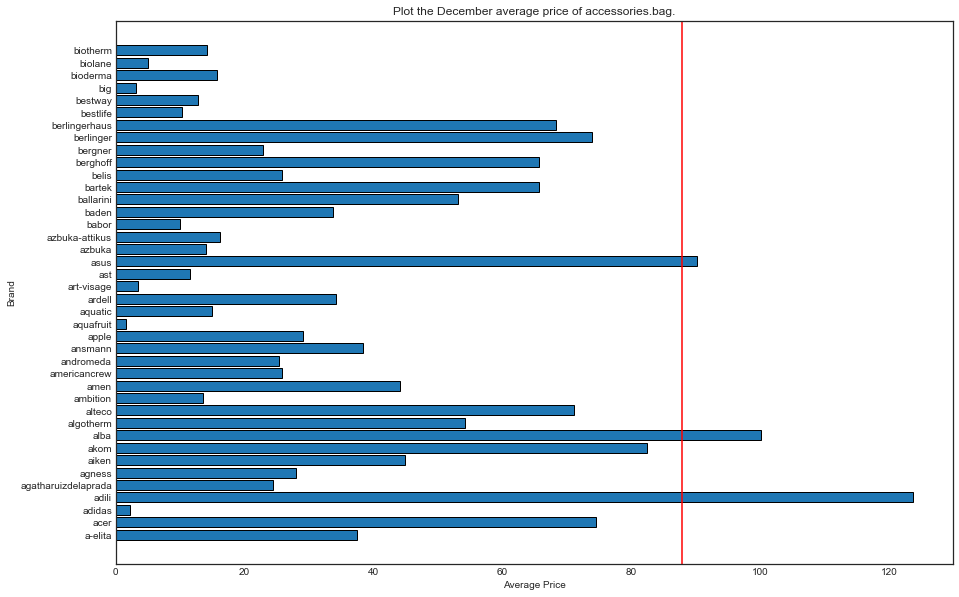

In [12]:
category_code_plot_avg_price('accessories.bag')

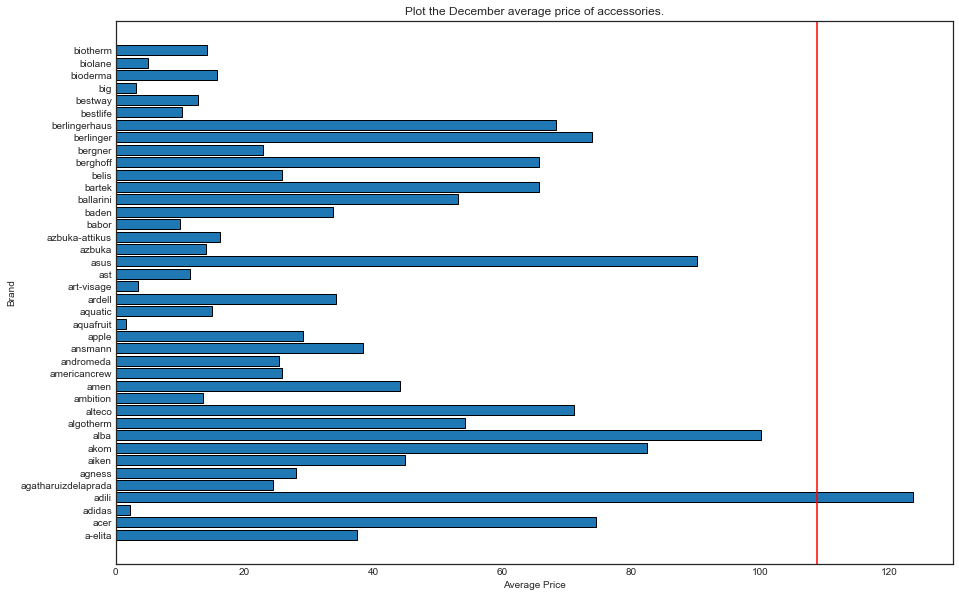

In [13]:
category_plot_avg_price('accessories')

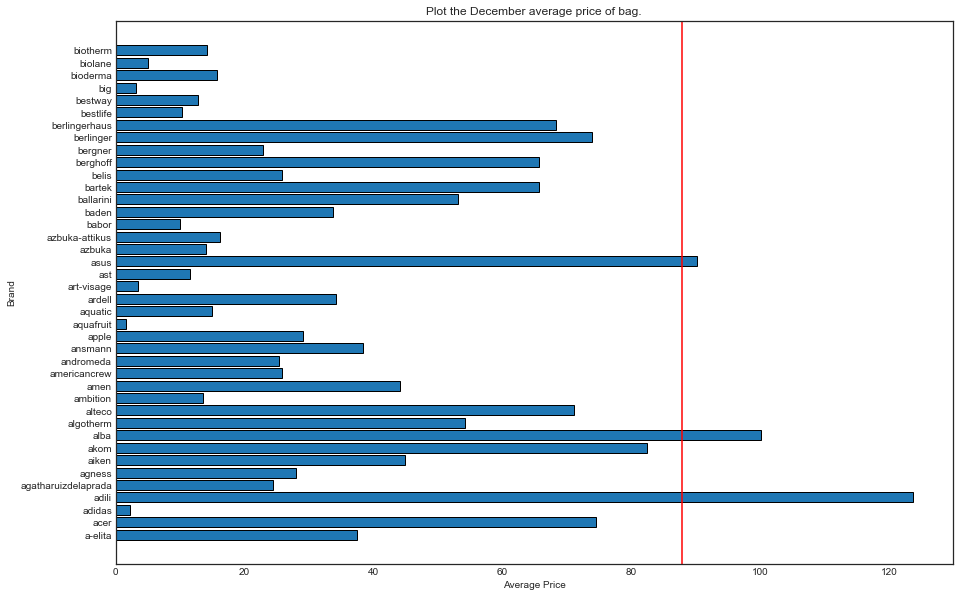

In [14]:
subcategory_plot_avg_price('bag')

 - Find, for each categoty, the brand with the highest average price.

In [15]:
# Find the Category Object with the Maximum Price 
Max_Price = table.groupby(['category'], as_index=False)['average_price'].max()
Max_Price

,category,average_price
0,accessories,1835.218077
1,apparel,2445.370000
2,appliances,2573.810000
3,auto,2268.010000
4,computers,2397.367678
5,construction,2344.980000
6,country_yard,2044.250000
7,electronics,2574.040000
8,furniture,1844.249717
9,kids,2548.330000


In [16]:
# Merge the two dataset
merge_dataset = Max_Price.merge(table, on='average_price')
# Select only conversion rate and sort in decring order
Merge_dataset = merge_dataset.drop(columns=['category_y'])
# rename the column
Merge_dataset = Merge_dataset.rename(columns={"category_x": "category", "average_price":"Max_price"})
Dataset_ascending = Merge_dataset.sort_values(by='Max_price', ascending=False, inplace=False)
Dataset_ascending

,category,Max_price,sub_category,category_code,brand
7,electronics,2574.040000,video.tv,electronics.video.tv,dexp
2,appliances,2573.810000,kitchen.toster,appliances.kitchen.toster,pinarello
9,kids,2548.330000,skates,kids.skates,volta
11,sport,2522.590000,trainer,sport.trainer,nordictrack
1,apparel,2445.370000,trousers,apparel.trousers,gomeldrev
4,computers,2397.367678,peripherals.printer,computers.peripherals.printer,sony
5,construction,2344.980000,tools.screw,construction.tools.screw,yjfitness
3,auto,2268.010000,accessories.winch,auto.accessories.winch,femi
6,country_yard,2044.250000,lawn_mower,country_yard.lawn_mower,shua
8,furniture,1844.249717,living_room.sofa,furniture.living_room.sofa,trevi


QUESTION 5:

            In what part of the day is your store most visited?

In [17]:
# Select part of the dataset
Month = selected_month.iloc[:,0:5]
Month = Month.drop(columns=['product_id','category_id'])
Month.head()

,event_time,event_type,category_code
0,2019-12-01 00:00:00 UTC,view,construction.tools.light
1,2019-12-01 00:00:00 UTC,view,NaN
2,2019-12-01 00:00:01 UTC,view,appliances.personal.massager
3,2019-12-01 00:00:02 UTC,purchase,computers.peripherals.printer
4,2019-12-01 00:00:02 UTC,view,apparel.trousers


In [18]:
Month.shape

(67542878, 3)

In [19]:
# Transform the data event_time in datatime
Month.event_time = pd.to_datetime(Month.event_time)

In [20]:
# Hour Visitor
Hour = Month.resample('H', on='event_time').event_type.count()
print(Hour)

event_time
2019-12-01 00:00:00+00:00    10465
2019-12-01 01:00:00+00:00    17188
2019-12-01 02:00:00+00:00    31348
2019-12-01 03:00:00+00:00    57666
2019-12-01 04:00:00+00:00    76115
                             ...  
2019-12-31 19:00:00+00:00    46625
2019-12-31 20:00:00+00:00    41984
2019-12-31 21:00:00+00:00    27580
2019-12-31 22:00:00+00:00    19349
2019-12-31 23:00:00+00:00    12294
Freq: H, Name: event_type, Length: 744, dtype: int64


In [21]:
# Days Visitor
Day = Month.resample('D', on='event_time').event_type.count()
print(Day)

event_time
2019-12-01 00:00:00+00:00    1821280
2019-12-02 00:00:00+00:00    1741047
2019-12-03 00:00:00+00:00    1644805
2019-12-04 00:00:00+00:00    1561912
2019-12-05 00:00:00+00:00    1638606
2019-12-06 00:00:00+00:00    1766962
2019-12-07 00:00:00+00:00    1838281
2019-12-08 00:00:00+00:00    1832067
2019-12-09 00:00:00+00:00    1736617
2019-12-10 00:00:00+00:00    1761547
2019-12-11 00:00:00+00:00    1712670
2019-12-12 00:00:00+00:00    1759533
2019-12-13 00:00:00+00:00    1747300
2019-12-14 00:00:00+00:00    1875688
2019-12-15 00:00:00+00:00    2313177
2019-12-16 00:00:00+00:00    3125460
2019-12-17 00:00:00+00:00    2989975
2019-12-18 00:00:00+00:00    2863599
2019-12-19 00:00:00+00:00    2716561
2019-12-20 00:00:00+00:00    2564676
2019-12-21 00:00:00+00:00    2510404
2019-12-22 00:00:00+00:00    2644963
2019-12-23 00:00:00+00:00    2548968
2019-12-24 00:00:00+00:00    2500248
2019-12-25 00:00:00+00:00    2497527
2019-12-26 00:00:00+00:00    2410581
2019-12-27 00:00:00+00:00  

In [22]:
# Weak Visitor (starting on monday)
Week_Mon = Month.resample('W-MON', on='event_time').event_type.count()
print(Week_Mon)

event_time
2019-12-02 00:00:00+00:00     3562327
2019-12-09 00:00:00+00:00    12019250
2019-12-16 00:00:00+00:00    14295375
2019-12-23 00:00:00+00:00    18839146
2019-12-30 00:00:00+00:00    17065188
2020-01-06 00:00:00+00:00     1761592
Freq: W-MON, Name: event_type, dtype: int64


In [23]:
# group the vistior's view with a range of 3H
Hour_6 = Month.resample('6H', on='event_time').event_type.count()
Hour_6 = pd.DataFrame(Hour_6)
Hour_6

,event_type
event_time,
2019-12-01 00:00:00+00:00,287863
2019-12-01 06:00:00+00:00,604987
2019-12-01 12:00:00+00:00,672675
2019-12-01 18:00:00+00:00,255755
2019-12-02 00:00:00+00:00,279062
...,...
2019-12-30 18:00:00+00:00,346590
2019-12-31 00:00:00+00:00,399851
2019-12-31 06:00:00+00:00,720384


In [24]:
# show in decresing order the view 3H (head)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).head(15)

,event_type
event_time,
2019-12-17 12:00:00+00:00,1107182
2019-12-16 12:00:00+00:00,1106526
2019-12-18 12:00:00+00:00,1105419
2019-12-16 06:00:00+00:00,1048669
2019-12-19 12:00:00+00:00,1028823
2019-12-17 06:00:00+00:00,1015220
2019-12-22 12:00:00+00:00,983582
2019-12-29 06:00:00+00:00,951525
2019-12-20 12:00:00+00:00,951279


In [25]:
# show in decresing order the view 3H (tail)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).tail(15)

,event_type
event_time,
2019-12-07 18:00:00+00:00,267208
2019-12-03 00:00:00+00:00,256125
2019-12-01 18:00:00+00:00,255755
2019-12-08 18:00:00+00:00,255124
2019-12-12 18:00:00+00:00,247566
2019-12-06 18:00:00+00:00,238621
2019-12-10 18:00:00+00:00,236840
2019-12-11 18:00:00+00:00,231528
2019-12-09 18:00:00+00:00,227969


In [26]:
# Create the daily view with the average hour view
Hour_df = pd.DataFrame(Hour)
Hour_df.reset_index(inplace=True)
Hours = Hour_df.resample('D', on='event_time').event_type.mean()
# Create a dataframe 
Hours_df = pd.DataFrame(Hours)
Hours_df.reset_index(inplace=True)
# Add the column value
Hours_df= Hours_df.rename(columns={'event_type': 'avg_hour_count'})
# add a columns with only the numbers of days
Hours_df['days'] = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,
               20,21,22,23,24,25,26,27,28,29,30,31]
Hours_df

,event_time,avg_hour_count,days
0,2019-12-01 00:00:00+00:00,75886.666667,1
1,2019-12-02 00:00:00+00:00,72543.625000,2
2,2019-12-03 00:00:00+00:00,68533.541667,3
3,2019-12-04 00:00:00+00:00,65079.666667,4
4,2019-12-05 00:00:00+00:00,68275.250000,5
5,2019-12-06 00:00:00+00:00,73623.416667,6
6,2019-12-07 00:00:00+00:00,76595.041667,7
7,2019-12-08 00:00:00+00:00,76336.125000,8
8,2019-12-09 00:00:00+00:00,72359.041667,9
9,2019-12-10 00:00:00+00:00,73397.791667,10


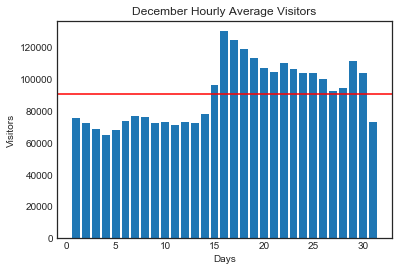

In [27]:
plt.figure()
plt.bar(Hours_df['days'],Hours_df['avg_hour_count'])
plt.axhline(Hours_df['avg_hour_count'].mean(), c='red')
plt.title('December Hourly Average Visitors')
plt.xlabel('Days')
plt.ylabel('Visitors')
plt.show()

QUESTION 6:

            What is the conversion rate of your store?

 - Find the overall conversion rate

In [3]:
# Select part of the dataset
Month = selected_month.iloc[:,1:6]
Month = Month.drop(columns=['brand'])
Month

,event_type,product_id,category_id,category_code
0,view,1005105,2232732093077520756,construction.tools.light
1,view,22700068,2232732091643068746,NaN
2,view,2402273,2232732100769874463,appliances.personal.massager
3,purchase,26400248,2053013553056579841,computers.peripherals.printer
4,view,20100164,2232732110089618156,apparel.trousers
...,...,...,...,...
67542873,view,1005118,2232732093077520756,construction.tools.light
67542874,view,1307229,2053013554658804075,electronics.audio.headphone
67542875,view,9300104,2053013554524586339,kids.dolls
67542876,view,4803759,2232732079706079299,sport.bicycle


In [4]:
# Count the number of the event type in the dataset
count = Month['event_type'].value_counts() 
# Transform the result in array
count = np.array(count)
# Find the Overall Conversion Rate
Overall_cr = count[2] / count[0] * 100
Overall_cr

1.8449286569996504

 - Plot the number of purchase per each category and show the conversion rate

In [5]:
#Groupby by the event type and the category code
table = Month.groupby(['category_code','event_type'], as_index=False).count()
# Fix the dataframe
table = table.rename(columns={"product_id": "count"})
table = table.iloc[:,0:3]
table

,category_code,event_type,count
0,accessories.bag,cart,13506
1,accessories.bag,purchase,3939
2,accessories.bag,view,516367
3,accessories.umbrella,cart,933
4,accessories.umbrella,purchase,238
...,...,...,...
398,sport.trainer,purchase,4090
399,sport.trainer,view,533951
400,stationery.cartrige,cart,1722
401,stationery.cartrige,purchase,462


In [6]:
# Selection only purchase value
purchase = table[table['event_type'] == 'purchase']
# Number of purchase in decresing order
purchase_sort = purchase.sort_values(by='count', ascending=False, inplace=False)
purchase_sort

,category_code,event_type,count
256,construction.tools.light,purchase,502073
383,sport.bicycle,purchase,58750
163,appliances.personal.massager,purchase,45633
40,apparel.shoes,purchase,38456
308,electronics.clocks,purchase,37640
...,...,...,...
139,appliances.kitchen.microwave,purchase,46
67,apparel.skirt,purchase,44
386,sport.diving,purchase,27
217,computers.components.sound_card,purchase,21


In [7]:
# Selection only view value
view = table[table['event_type'] == 'view']
# Merge Purchase and View Dataset
Merge = purchase.merge(view, on='category_code')
Merge = Merge.rename(columns={"category_x": "count"})
Merge

,category_code,event_type_x,count_x,event_type_y,count_y
0,accessories.bag,purchase,3939,view,516367
1,accessories.umbrella,purchase,238,view,54027
2,accessories.wallet,purchase,3169,view,300996
3,apparel.belt,purchase,78,view,7752
4,apparel.costume,purchase,5191,view,447905
...,...,...,...,...,...
129,sport.ski,purchase,7287,view,576543
130,sport.snowboard,purchase,463,view,68569
131,sport.tennis,purchase,522,view,56558
132,sport.trainer,purchase,4090,view,533951


In [8]:
# Split the "category_code" data in category and sub_category
Merge['category'], Merge['sub_category'] = Merge['category_code'].str.split('.', 1).str
Merge = Merge.drop(columns=['sub_category', 'category_code']) 
Merge

,event_type_x,count_x,event_type_y,count_y,category
0,purchase,3939,view,516367,accessories
1,purchase,238,view,54027,accessories
2,purchase,3169,view,300996,accessories
3,purchase,78,view,7752,apparel
4,purchase,5191,view,447905,apparel
...,...,...,...,...,...
129,purchase,7287,view,576543,sport
130,purchase,463,view,68569,sport
131,purchase,522,view,56558,sport
132,purchase,4090,view,533951,sport


In [9]:
Merge = Merge.groupby(['category','event_type_x','event_type_y'], as_index=False).sum()
Merge

,category,event_type_x,event_type_y,count_x,count_y
0,accessories,purchase,view,7346,871390
1,apparel,purchase,view,110018,8628700
2,appliances,purchase,view,172525,11078790
3,auto,purchase,view,7722,624968
4,computers,purchase,view,34687,3224080
5,construction,purchase,view,522440,16548672
6,country_yard,purchase,view,1215,79521
7,electronics,purchase,view,92401,7101058
8,furniture,purchase,view,36558,3020643
9,kids,purchase,view,17314,1686864


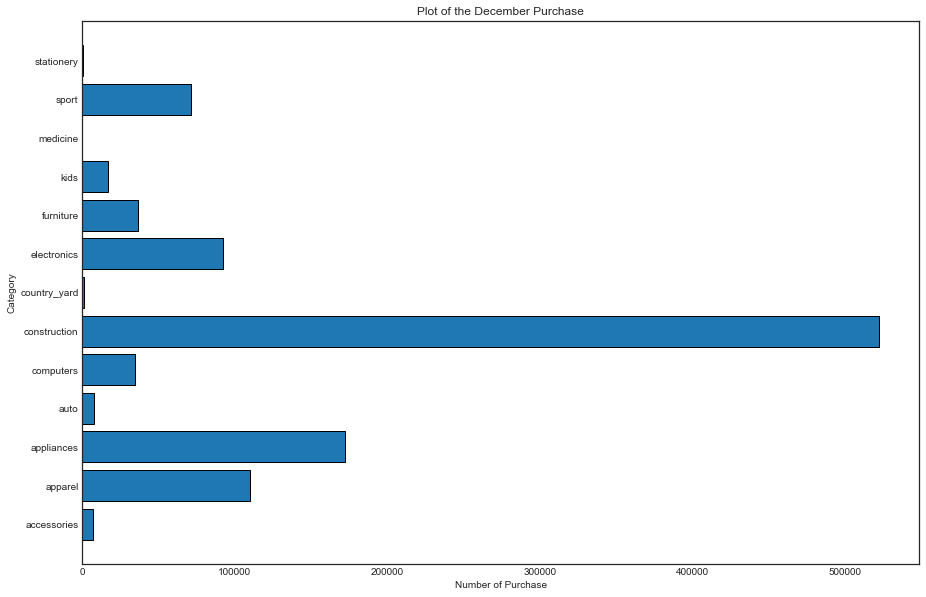

In [10]:
# Make a horizontal bar chart 
plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.barh(Merge['category'],
        Merge['count_x'], 
            align = 'center', edgecolor = 'k')
plt.xlabel('Number of Purchase')
plt.ylabel('Category')
plt.title('Plot of the December Purchase')
plt.show()

In [11]:
# Add the column 'conversion_rate'
Merge['conversion_rate'] = (Merge['count_x'] / Merge['count_y'])*100
Merge

,category,event_type_x,event_type_y,count_x,count_y,conversion_rate
0,accessories,purchase,view,7346,871390,0.843021
1,apparel,purchase,view,110018,8628700,1.275024
2,appliances,purchase,view,172525,11078790,1.557255
3,auto,purchase,view,7722,624968,1.235583
4,computers,purchase,view,34687,3224080,1.075873
5,construction,purchase,view,522440,16548672,3.156990
6,country_yard,purchase,view,1215,79521,1.527898
7,electronics,purchase,view,92401,7101058,1.301229
8,furniture,purchase,view,36558,3020643,1.210272
9,kids,purchase,view,17314,1686864,1.026402


In [12]:
# Select only conversion rate and sort in decring order
Merge = Merge.drop(columns=['event_type_x','count_x','event_type_y','count_y'])
Merge_dec = Merge.sort_values(by='conversion_rate', ascending=False, inplace=False)
Merge_dec

,category,conversion_rate
5,construction,3.156990
11,sport,2.104632
2,appliances,1.557255
6,country_yard,1.527898
7,electronics,1.301229
1,apparel,1.275024
3,auto,1.235583
8,furniture,1.210272
12,stationery,1.094190
10,medicine,1.076850


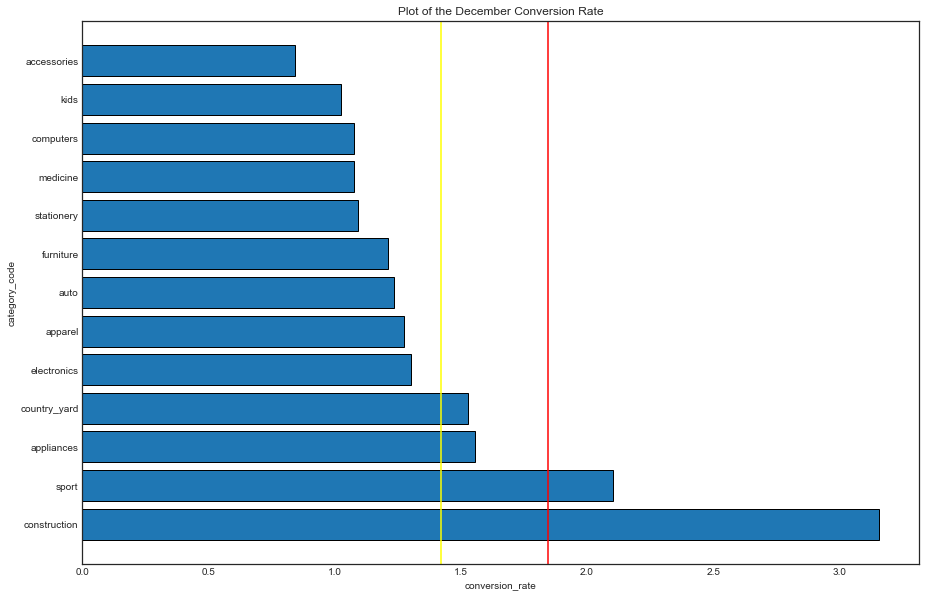

In [13]:
# Make a horizontal bar chart for the conversion rate 
plt.figure(figsize = (15,10))
ax = plt.subplot()
ax.barh(Merge_dec['category'],
        Merge_dec['conversion_rate'], 
            align = 'center', edgecolor = 'k')
plt.axvline(Overall_cr, c='red')
plt.axvline(Merge_dec['conversion_rate'].mean(), c='yellow')
plt.xlabel('conversion_rate')
plt.ylabel('category_code')
plt.title('Plot of the December Conversion Rate')
plt.show()

In [14]:
print(Merge_dec['conversion_rate'])

5     3.156990
11    2.104632
2     1.557255
6     1.527898
7     1.301229
1     1.275024
3     1.235583
8     1.210272
12    1.094190
10    1.076850
4     1.075873
9     1.026402
0     0.843021
Name: conversion_rate, dtype: float64
